# INM433 Visual Analytics Coursework




Student Name: **Ayliah Fani**

Project Title: **A Visual Exploration of Canadian Immigration**

***





**import libraries:**

Pandas version: 1.2.0


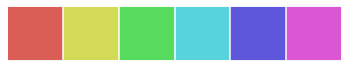

In [16]:
import pandas as pd
import altair as alt
import folium
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np
import openpyxl
import json
import plotly

# setting seaborn figure aesthetics
sns.set(context='talk', style='darkgrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# set colours 
palette = sns.color_palette('hls')
sns.set_palette(palette)
sns.palplot(palette)

# setting pandas to show all rows and columns when acessing dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print ('Pandas version:',pd.__version__)

* has implementation of new immigration policy impacted the number of migrants coming into the country?
* what are the largest migrant groups?
* how have world events impacted the migrant demographics?
* what is the socio-economic status of immigrants?

***
## 1. Data Aquisition & Cleaning
***
### 1.1 Immigration by Country

#### Import & Clean

In [17]:
# import 'immigration by country' dataset
immigration = pd.read_excel('Canada.xlsx', engine='openpyxl')
# immigration

In [18]:
# get rid of top rows
immigration = immigration.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# rename columns to first row
immigration.columns = immigration.iloc[0]

# drop first row
immigration.drop(index=19, inplace = True, axis=0)

# drop unnecessary columns and rename columns
immigration.drop(columns=['Type', 'Coverage','AREA','REG','DEV'], inplace=True)

# get rid of NaN columns
immigration.dropna(axis=1,thresh=10, inplace=True)

# get rid of NaN Rows
immigration.dropna(axis=0,thresh=10, inplace=True)

# rename columns
immigration.columns = ['Country','Continent','Region','Development',
                       '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                       '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                       '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                       '2010','2011','2012','2013']

print('Dataframe has {} rows and {} columns'.format(immigration.shape[0], immigration.shape[1]))

Dataframe has 197 rows and 38 columns


In [19]:
#re-index dataframe
immigration.reset_index(drop=True, inplace=True)

#### Yearly Immigration by Country

In [24]:
immigration_year = immigration.copy()

# drop row 196 (yearly total immigration from all countries)
immigration_year.drop(index=196, inplace = True, axis=0)

to_pivot = immigration_year.drop(['Continent', 'Region', 'Development'], axis=1)


years = ['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
         '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
         '2010','2011','2012','2013']

immigration_year = pd.melt(to_pivot, id_vars =['Country'], value_vars = years)

immigration_year.head()

,Country,variable,value
0,Afghanistan,1980,16.0
1,Albania,1980,1.0
2,Algeria,1980,80.0
3,American Samoa,1980,0.0
4,Andorra,1980,0.0


#### Immigration Each Decade per Country

In [14]:
# create dataframe for total immigration per country
immigration_decade = immigration.copy()

# sum migrants arriving for all years
immigration_decade['total immigration']=immigration_decade.sum(axis=1)

# migrants arriving in each decade
eighties = ['1980', '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989']
nineties = ['1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
thousands = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']

immigration_decade['1980s immigration']=immigration_decade[eighties].sum(axis=1)
immigration_decade['1990s immigration']=immigration_decade[nineties].sum(axis=1)
immigration_decade['2000s immigration']=immigration_decade[thousands].sum(axis=1)

# drop year columns
immigration_decade.drop(columns=['1980', '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
                              '2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                            '2010', '2011', '2012', '2013'], inplace=True)
# drop row 196
immigration_decade.drop(index=196, inplace = True, axis=0)

immigration_decade.head()

,Country,Continent,Region,Development,total immigration,1980s immigration,1990s immigration,2000s immigration
0,Afghanistan,Asia,Southern Asia,Developing regions,58639.0,3693.0,15845.0,30501.0
1,Albania,Europe,Southern Europe,Developed regions,15699.0,9.0,2568.0,10799.0
2,Algeria,Africa,Northern Africa,Developing regions,69439.0,1271.0,13153.0,37833.0
3,American Samoa,Oceania,Polynesia,Developing regions,6.0,3.0,2.0,1.0
4,Andorra,Europe,Southern Europe,Developed regions,15.0,2.0,6.0,5.0


### 1.2 Total Immigration per Year

In [8]:
# get the total immigration for each year
totals = pd.DataFrame(immigration.iloc[196])

# make index into column
totals = totals.reset_index(level=0, inplace=False)

# drop unneeded rows in the beginning
totals = totals.drop([0,1,2,3])
totals.reset_index(drop=True, inplace=True)

# rename columns
totals.columns = ['Year','Immigration']

# change data type
totals['Year'] = totals['Year'].astype('datetime64[ns]')
totals['Immigration'] = totals['Immigration'].astype('int64')
totals.head()

,Year,Immigration
0,1980-01-01,143137
1,1981-01-01,128641
2,1982-01-01,121175
3,1983-01-01,89185
4,1984-01-01,88272


***
### 1.2 Immigration by Region & Continent
#### Import and Clean

In [9]:
# import 'immigration by region' dataset
df_region = pd.read_excel('Regions by Citizenship.xlsx', engine='openpyxl')

# drop stylised header
df_region = df_region.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# rename columns to first row
df_region.columns = df_region.iloc[0]

# drop first row now that we have the column names from it
df_region = df_region.drop([19])

# drop 'type' and 'coverage' columns
df_region.drop(columns=['Type', 'Coverage'], inplace=True)

# get rid of NaN columns
df_region.dropna(axis=1,thresh=10, inplace=True)

# get rid of NaN rows
df_region.dropna(axis=0, thresh=10, inplace=True)

# rename columns
df_region.columns = ['Continent','Region','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                     '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

# drop "northern america" since there is no data
df_region = df_region.drop([20])

# reindex
df_region.reset_index(drop=True, inplace=True)

#### Immigration by Continent

In [10]:
# find out the names of continents present
print(df_region.Continent.unique())

['Africa' 'Africa Total' 'Asia' 'Asia Total' 'Europe' 'Europe Total'
 'Latin America and the Caribbean' 'Latin America and the Caribbean Total'
 'Northern America' 'Oceania' 'Oceania Total' 'Unknown']


In [11]:
# create new DF with only the continents
continents = ['Africa Total','Asia Total' , 'Europe Total','Latin America and the Caribbean Total','Northern America', 'Oceania Total','Unknown']

df_continents =  df_region[df_region['Continent'].isin(continents)]

# drop region column
df_continents.drop(columns=['Region'], inplace=True)

# transpose the dataframe for time series
df_continents = df_continents.T

# make index into column
df_continents = df_continents.reset_index(level=0, inplace=False)

# rename columns to first row
df_continents.columns = df_continents.iloc[0]

# drop first row
df_continents.drop(index=0, inplace = True, axis=0)

# reindex
df_continents.reset_index(drop=True, inplace=True)

# correct column name from "continent" to "year"
df_continents.columns = ['Year','Africa','Asia','Europe','Latin America and the Carribbean','North America','Oceania','Unknown']

# change data types
df_continents['Year'] = df_continents['Year'].astype('datetime64[ns]')
df_continents['Africa'] = df_continents['Africa'].astype('int64')
df_continents['Asia'] = df_continents['Asia'].astype('int64')
df_continents['Europe'] = df_continents['Europe'].astype('int64')
df_continents['Latin America and the Carribbean'] = df_continents['Latin America and the Carribbean'].astype('int64')
df_continents['North America'] = df_continents['North America'].astype('int64')
df_continents['Oceania'] = df_continents['Oceania'].astype('int64')
df_continents['Unknown'] = df_continents['Unknown'].astype('int64')

df_continents.head()

/Users/Ayliah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Africa,Asia,Europe,Latin America and the Carribbean,North America,Oceania,Unknown
0,1980-01-01,3951,31025,39760,13081,9378,1942,44000
1,1981-01-01,4363,34314,44802,15215,10030,1839,18078
2,1982-01-01,3819,30214,42720,16769,9074,1675,16904
3,1983-01-01,2671,24696,24638,15427,7100,1018,13635
4,1984-01-01,2639,27274,22287,13678,6661,878,14855


#### Immigration by Region

In [12]:
print(df_region.Region.unique())

['Eastern Africa' 'Middle Africa' 'Northern Africa' 'Southern Africa'
 'Western Africa' nan 'Central Asia' 'Eastern Asia' 'South-Eastern Asia'
 'Southern Asia' 'Western Asia' 'Eastern Europe' 'Northern Europe'
 'Southern Europe' 'Western Europe' 'Caribbean' 'Central America'
 'South America' 'Northern America' 'Australia and New Zealand'
 'Melanesia' 'Micronesia' 'Polynesia' 'Unknown']


In [13]:
regions = ['Eastern Africa','Middle Africa','Northern Africa','Southern Africa', 'Western Africa', 'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia',
           'Eastern Europe','Northern Europe', 'Southern Europe', 'Western Europe', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Australia and New Zealand', 'Melanesia',
           'Micronesia','Polynesia']

df_regions =  df_region[df_region['Region'].isin(regions)]

# transpose the dataframe for time series
df_regions = df_regions.T

# make index into column
df_regions = df_regions.reset_index(level=0, inplace=False)

# rename columns to second row
df_regions.columns = df_regions.iloc[1]

# drop first row and second
df_regions.drop(index=0, inplace = True, axis=0)
df_regions.drop(index=1, inplace = True, axis=0)

# reindex
df_regions.reset_index(drop=True, inplace=True)

# fix column names
df_regions.columns = ['Year','Eastern Africa','Middle Africa','Northern Africa','Southern Africa', 'Western Africa', 'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 'Southern Asia', 'Western Asia',
           'Eastern Europe','Northern Europe', 'Southern Europe', 'Western Europe', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Australia and New Zealand', 'Melanesia',
           'Micronesia','Polynesia']
# get rid of '••' in some columns
df_regions = df_regions.mask(df_regions=='..', other=0)

# change data types
df_regions['Year'] = df_regions['Year'].astype('datetime64[ns]')

for i in range(1,len(df_regions.columns)):
    df_regions.iloc[:,i] = df_regions.iloc[:,i].astype('int64')
    
df_regions.head()

,Year,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa,Central Asia,Eastern Asia,South-Eastern Asia,Southern Asia,Western Asia,Eastern Europe,Northern Europe,Southern Europe,Western Europe,Caribbean,Central America,South America,Northern America,Australia and New Zealand,Melanesia,Micronesia,Polynesia
0,1980-01-01,1471,33,1100,1041,306,0,6836,8693,11315,4181,1467,23721,7762,6810,7045,734,5302,9378,1304,632,1,5
1,1981-01-01,1641,27,1268,1126,301,0,8895,9191,11566,4662,3698,26608,7037,7459,8310,921,5984,10030,1119,707,0,13
2,1982-01-01,1426,44,1348,791,210,0,5481,9022,11591,4120,6873,22134,5222,8491,8326,1612,6831,9074,848,816,0,11
3,1983-01-01,1094,32,936,387,222,0,3254,8845,10157,2440,5459,10725,3083,5371,6998,3648,4781,7100,457,558,1,2
4,1984-01-01,1187,42,842,297,271,0,2624,12161,9607,2882,4433,10845,3033,3976,5553,4087,4038,6661,481,391,0,6


***
## 2. Visualisations
### 2.1 Immigration per Year

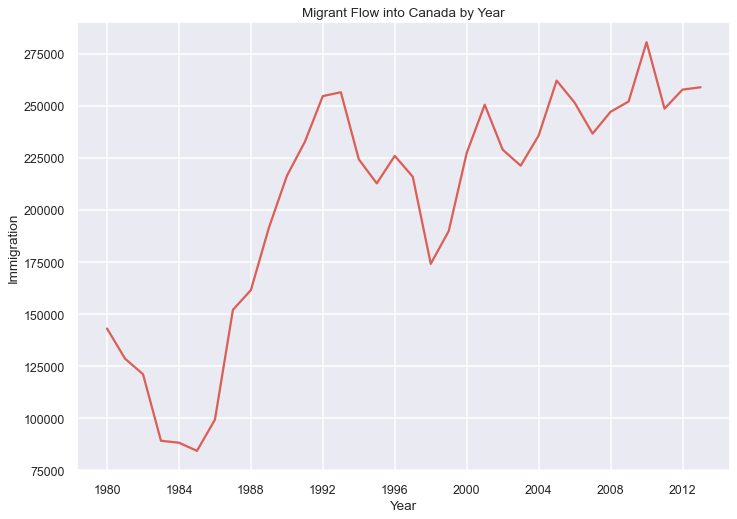

In [20]:
sns.lineplot(data=totals, x='Year', y='Immigration');
plt.title('Migrant Flow into Canada by Year');

### 2.2 Immigration by Continent

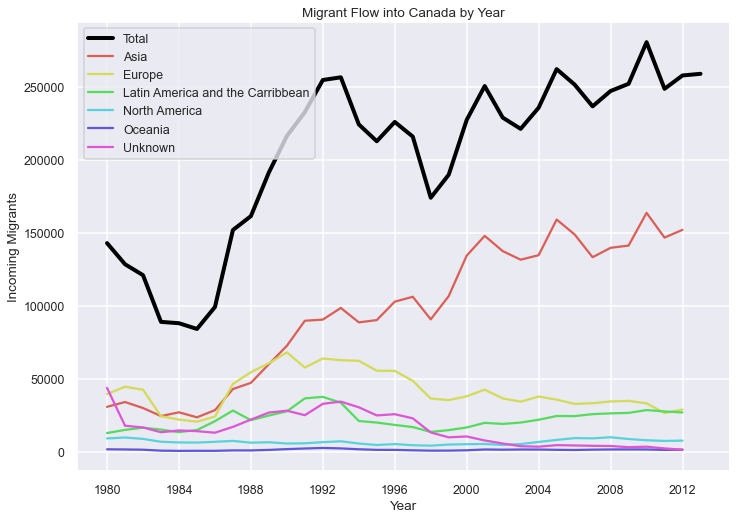

In [23]:
sns.lineplot(data=totals, x='Year', y='Immigration', color="black", linewidth=4);
sns.lineplot(data=df_continents, x='Year',y='Asia');
sns.lineplot(data=df_continents, x='Year', y='Europe');
sns.lineplot(data=df_continents, x='Year', y='Latin America and the Carribbean');
sns.lineplot(data=df_continents, x='Year', y='North America');
sns.lineplot(data=df_continents, x='Year', y='Oceania');
sns.lineplot(data=df_continents, x='Year', y='Unknown');
plt.legend(['Total','Asia', 'Europe', 'Latin America and the Carribbean','North America','Oceania','Unknown'])
plt.title('Migrant Flow into Canada by Year');
plt.ylabel('Incoming Migrants');

**NOTES:** the number fo asian immigrants is much higher than other continents, lets look further into which parts of Asia they are coming from

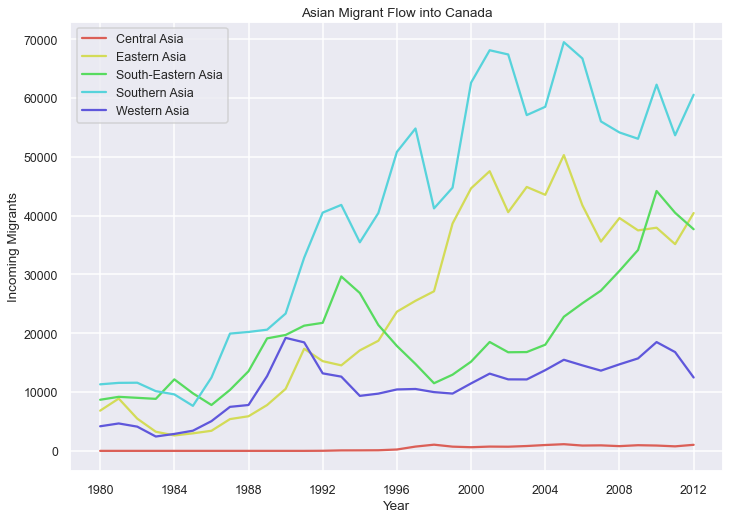

In [24]:
sns.lineplot(data=df_regions, x='Year',y='Central Asia', palette=None);
sns.lineplot(data=df_regions, x='Year',y='Eastern Asia');
sns.lineplot(data=df_regions, x='Year',y='South-Eastern Asia');
sns.lineplot(data=df_regions, x='Year',y='Southern Asia');
sns.lineplot(data=df_regions, x='Year',y='Western Asia');
plt.title('Asian Migrant Flow into Canada');
plt.ylabel('Incoming Migrants');
plt.legend(['Central Asia','Eastern Asia','South-Eastern Asia','Southern Asia','Western Asia']);

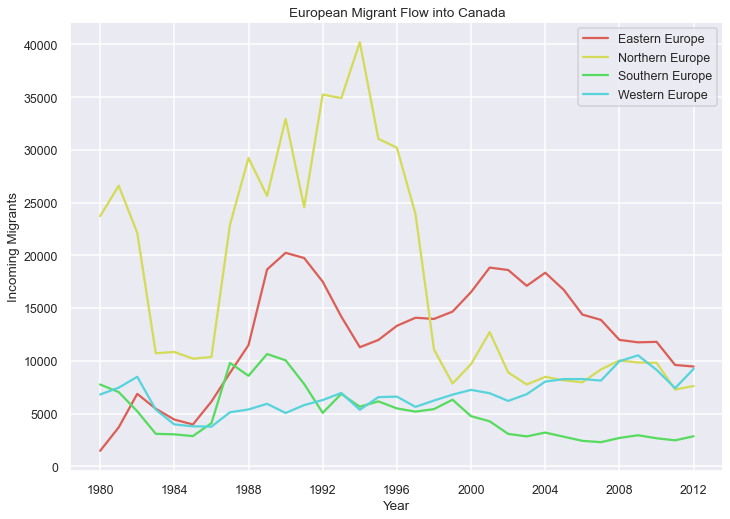

In [25]:
sns.lineplot(data=df_regions, x='Year',y='Eastern Europe');
sns.lineplot(data=df_regions, x='Year',y='Northern Europe');
sns.lineplot(data=df_regions, x='Year',y='Southern Europe');
sns.lineplot(data=df_regions, x='Year',y='Western Europe');
plt.title('European Migrant Flow into Canada');
plt.ylabel('Incoming Migrants');
plt.legend(['Eastern Europe','Northern Europe','Southern Europe','Western Europe']);

### 2.3 Immigration by Country

In [27]:
continents = immigration_country.groupby(immigration_country.Continent)
europe = continents.get_group("Europe")
oceania = continents.get_group("Oceania")
north_america = continents.get_group("Northern America")
asia = continents.get_group("Asia")
south_america = continents.get_group("Latin America and the Caribbean")
africa = continents.get_group("Africa")

#### 2.3.1 Europe

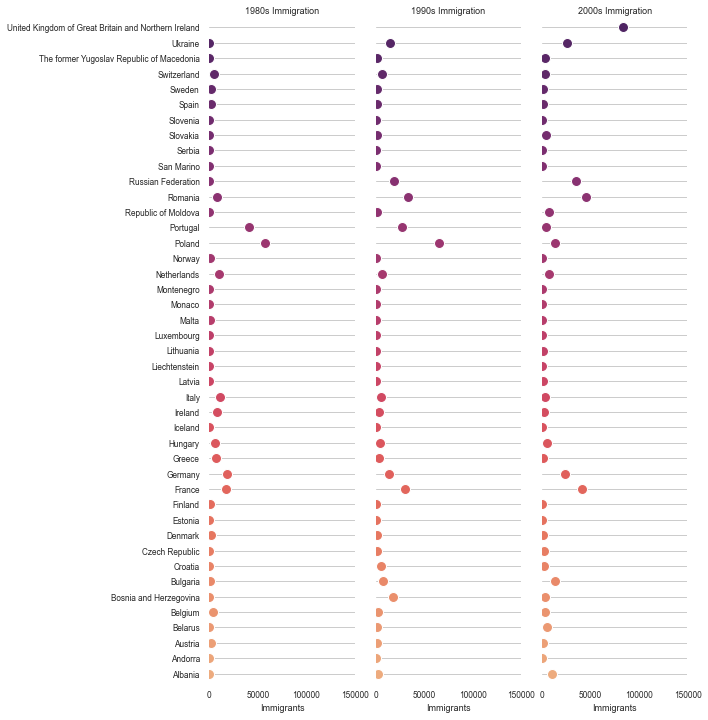

In [28]:
sns.set(context='notebook', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# Make the PairGrid
g = sns.PairGrid(europe.sort_values("Country", ascending=False),
                 x_vars=europe.columns[5:8], y_vars=["Country"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 150000), xlabel="Immigrants", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["1980s Immigration", "1990s Immigration",
          "2000s Immigration"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### 2.3.2 Asia

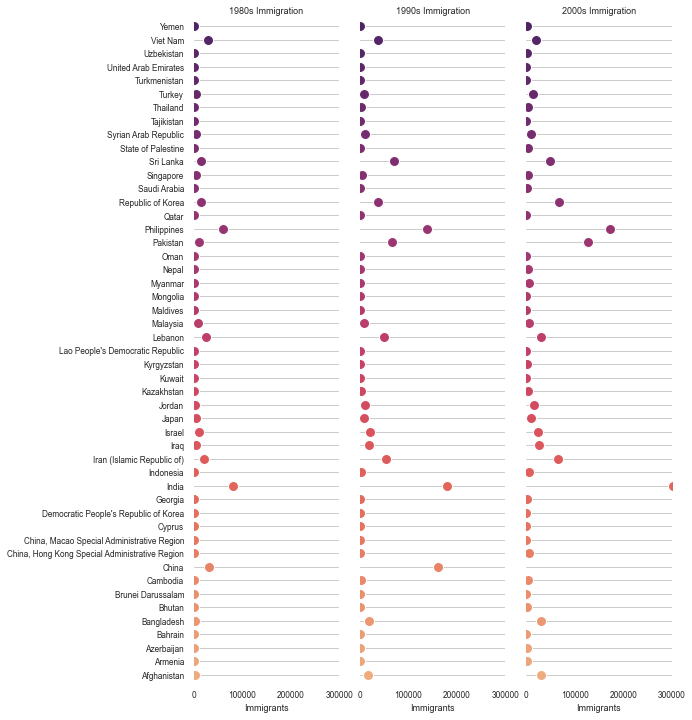

In [29]:
sns.set(context='notebook', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# Make the PairGrid
g = sns.PairGrid(asia.sort_values("Country", ascending=False),
                 x_vars=asia.columns[5:8], y_vars=["Country"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 300000), xlabel="Immigrants", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["1980s Immigration", "1990s Immigration",
          "2000s Immigration"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### 2.3.3 South America

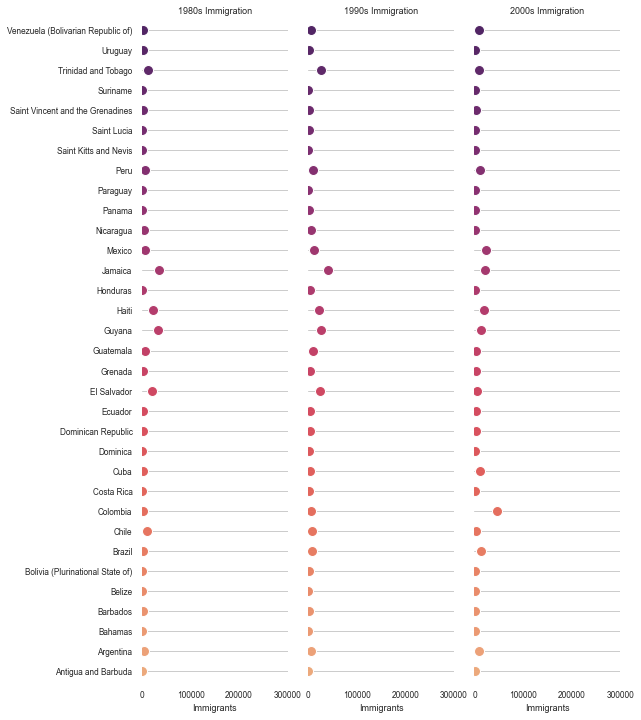

In [30]:
sns.set(context='notebook', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# Make the PairGrid
g = sns.PairGrid(south_america.sort_values("Country", ascending=False),
                 x_vars=south_america.columns[5:8], y_vars=["Country"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 300000), xlabel="Immigrants", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["1980s Immigration", "1990s Immigration",
          "2000s Immigration"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### 2.3.4 Africa

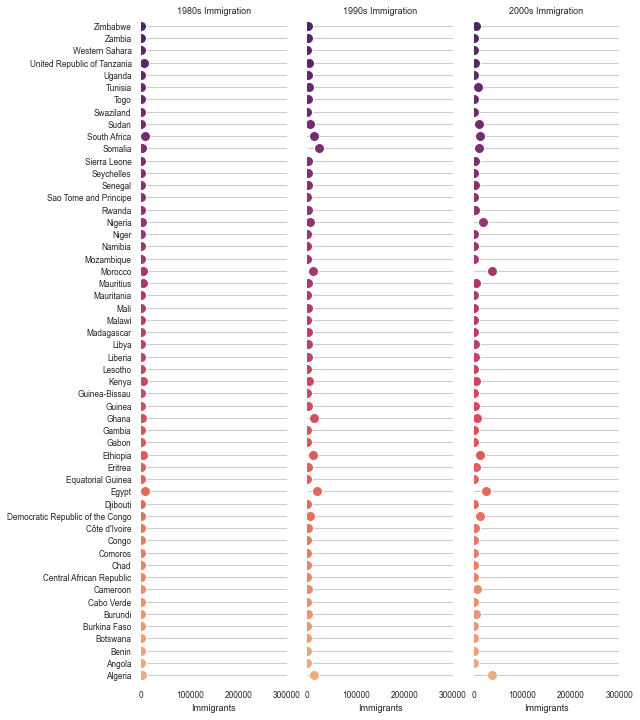

In [31]:
sns.set(context='notebook', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# Make the PairGrid
g = sns.PairGrid(africa.sort_values("Country", ascending=False),
                 x_vars=africa.columns[5:8], y_vars=["Country"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 300000), xlabel="Immigrants", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["1980s Immigration", "1990s Immigration",
          "2000s Immigration"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### 2.3.5 Oceania

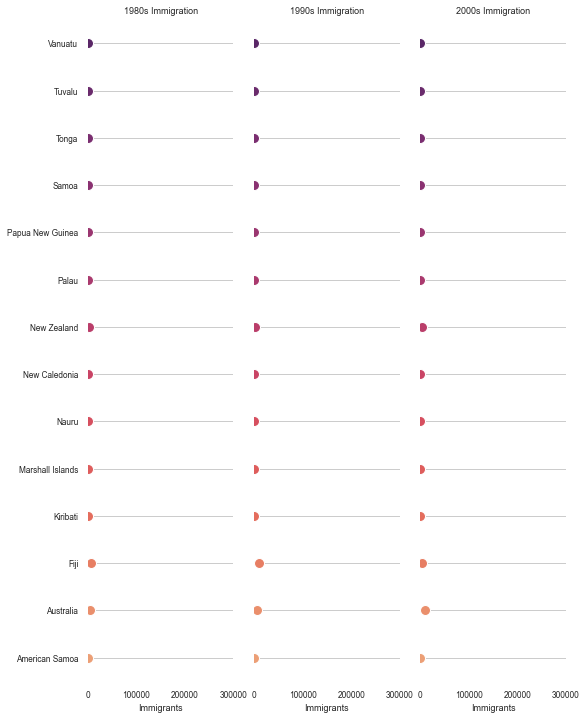

In [32]:
sns.set(context='notebook', style='whitegrid',font_scale=0.75, color_codes=True, rc={'figure.figsize':(11.7,8.27)})

# Make the PairGrid
g = sns.PairGrid(oceania.sort_values("Country", ascending=False),
                 x_vars=oceania.columns[5:8], y_vars=["Country"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 300000), xlabel="Immigrants", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["1980s Immigration", "1990s Immigration",
          "2000s Immigration"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### Cloropleth Maps

In [31]:
immigration_year.head()

,Country,variable,value
0,Afghanistan,1980,16.0
1,Albania,1980,1.0
2,Algeria,1980,80.0
3,American Samoa,1980,0.0
4,Andorra,1980,0.0


<ipython-input-38-08388c920680>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



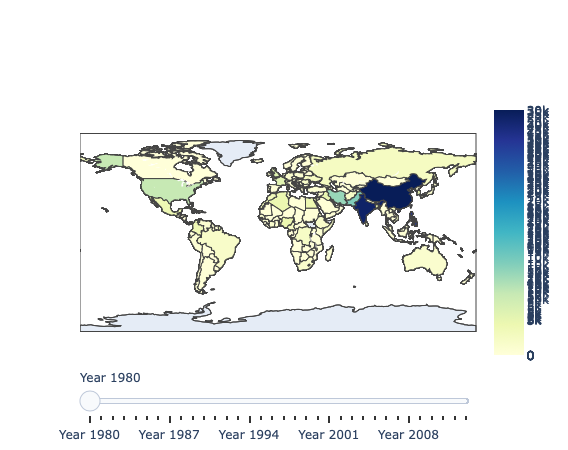

In [38]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data_slider = []

for year in immigration_year['variable'].unique():

    # I select the year
    df_year = immigration_year[immigration_year['variable'] == year]

    for col in df_year.columns:  # I transform the columns into string type so I can:
        df_year[col] = df_year[col].astype(str)

    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_year['Country'],
                        z=df_year['value'].astype(float),
                        locationmode='country names',
                        colorscale = "YlGnBu",
                        )

    data_slider.append(data_one_year)
    

##  I create the steps for the slider
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1980)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)

##  I create the 'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 


# I set up the layout (including slider option)
layout = dict(geo=dict(scope='world',
                       showcountries = True,
                       projection={'type': 'equirectangular'}),
              sliders=sliders)


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 


# to plot in the notebook
plotly.offline.iplot(fig)